In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
df = pd.read_csv('/home/students/code/MLP/Menelaos/reaction_conditions/dataprocessing_MTE/cleaned_sintering_dataset_encoded_v4.csv')

In [3]:
df.columns

Index(['doi', 'paragraph_string', 'synthesis_type', 'original_reaction_string',
       'string_requires_resolution', 'reaction_string', 'string_resolved',
       'reaction_non_zero', 'target', 'sintering_temp_sourced',
       ...
       'left_hand_representation_mtencoder_256',
       'target_compound_representation_mtencoder_256',
       'left_hand_representation_mtencoder_512',
       'target_compound_representation_mtencoder_512',
       'left_hand_representation_matminer',
       'target_compound_representation_matminer',
       'left_hand_representation_composition',
       'target_compound_representation_composition',
       'left_hand_representation_matscibert',
       'target_compound_representation_matscibert'],
      dtype='object', length=194)

In [4]:
df['left_hand_representation_mtencoder_256'] = df['left_hand_representation_mtencoder_256'].apply(ast.literal_eval)
df['target_compound_representation_mtencoder_256'] = df['target_compound_representation_mtencoder_256'].apply(ast.literal_eval)

In [5]:
base_dim = len(df['left_hand_representation_mtencoder_256'].loc[0][0])
prec_dim = base_dim*10

all_reactants = []
for i in range(len(df)):
    merged_list = []
    for sublist in df['left_hand_representation_mtencoder_256'].iloc[i]:
        merged_list.extend(sublist)
    merged_list.extend([0] * (prec_dim - len(merged_list)))
    
    merged_list.extend(df['target_compound_representation_mtencoder_256'].iloc[i])
    all_reactants.append(merged_list)

In [6]:
all_reactants = np.array(all_reactants)

In [7]:
len(all_reactants[3])

2816

In [8]:
len(all_reactants[0])==prec_dim+base_dim

True

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
all_reactants_pca = pca.fit_transform(all_reactants)

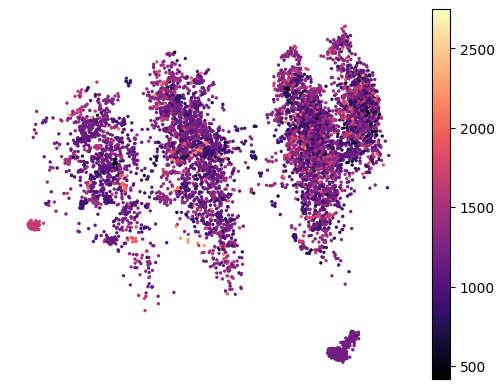

In [10]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(all_reactants_pca[:, 0], all_reactants_pca[:, 1], c=df['sintering_temp'], s=2, cmap='magma')


# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the axis border (making the plot less boxy)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add the colorbar
plt.colorbar(label='')

plt.savefig('mte.png', dpi=300)
# Show the plot
plt.show()


0.5 Li2CO3 + 2 MnCO3 + 0.75 O2 == 1 LiMn2O4 + 2.5 CO2
LiMn2O4


/tmp/ipykernel_3282888/146797804.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(all_reactants_pca[:, 0], all_reactants_pca[:, 1],  s=2, cmap='magma')


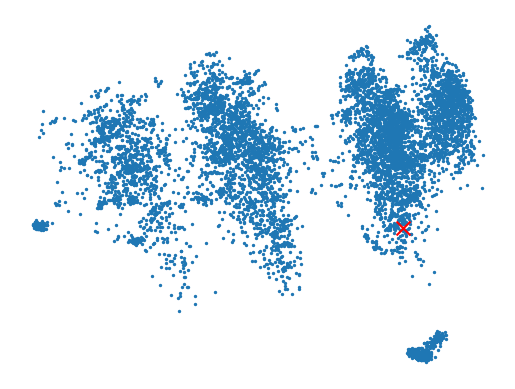

In [11]:
import matplotlib.pyplot as plt

highlight_index = 12
# Create the scatter plot
plt.scatter(all_reactants_pca[:, 0], all_reactants_pca[:, 1],  s=2, cmap='magma')
plt.scatter(all_reactants_pca[highlight_index, 0], all_reactants_pca[highlight_index, 1], s=100, c='red', marker='x')

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Get the row in the dataframe corresponding to the highlighted datapoint
print(df.iloc[highlight_index].original_reaction_string)
print(df.iloc[highlight_index].target)
# Remove the axis border (making the plot less boxy)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.savefig('compos.png', dpi=300)
# Show the plot
plt.show()


In [12]:
df['left_hand_representation_composition'] = df['left_hand_representation_composition'].apply(ast.literal_eval)
df['target_compound_representation_composition'] = df['target_compound_representation_composition'].apply(ast.literal_eval)

In [13]:
base_dim = len(df['left_hand_representation_composition'].loc[0][0])
prec_dim = base_dim*10

all_reactants = []
for i in range(len(df)):
    merged_list = []
    for sublist in df['left_hand_representation_composition'].iloc[i]:
        merged_list.extend(sublist)
    merged_list.extend([0] * (prec_dim - len(merged_list)))
    
    merged_list.extend(df['target_compound_representation_composition'].iloc[i])
    all_reactants.append(merged_list)

In [14]:
all_reactants = np.array(all_reactants)

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
all_reactants_pca = pca.fit_transform(all_reactants)

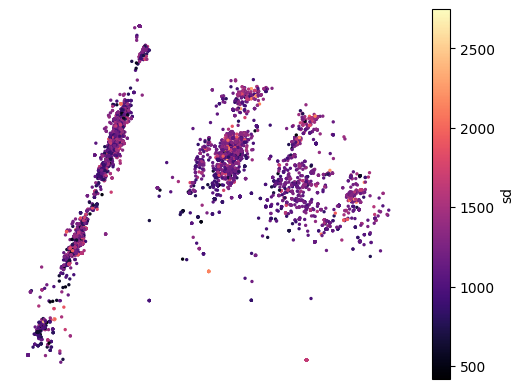

In [16]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(all_reactants_pca[:, 0], all_reactants_pca[:, 1], c=df['sintering_temp'], s=2, cmap='magma')


# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the axis border (making the plot less boxy)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add the colorbar
plt.colorbar(label='sd')

plt.savefig('compos.png', dpi=300)
# Show the plot
plt.show()


0.5 Li2CO3 + 2 MnCO3 + 0.75 O2 == 1 LiMn2O4 + 2.5 CO2
LiMn2O4


/tmp/ipykernel_3282888/146797804.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(all_reactants_pca[:, 0], all_reactants_pca[:, 1],  s=2, cmap='magma')


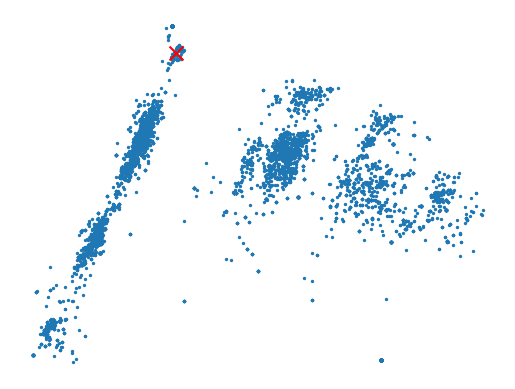

In [17]:
import matplotlib.pyplot as plt

highlight_index = 12
# Create the scatter plot
plt.scatter(all_reactants_pca[:, 0], all_reactants_pca[:, 1],  s=2, cmap='magma')
plt.scatter(all_reactants_pca[highlight_index, 0], all_reactants_pca[highlight_index, 1], s=100, c='red', marker='x')

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Get the row in the dataframe corresponding to the highlighted datapoint
print(df.iloc[highlight_index].original_reaction_string)
print(df.iloc[highlight_index].target)
# Remove the axis border (making the plot less boxy)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.savefig('compos.png', dpi=300)
# Show the plot
plt.show()
